In [18]:
#import all the package needed
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.metrics import mean_squared_error
import math

In [11]:
# data import
res_path = "F:\weather clustering\Github\Hourly BEM.csv"

res_data = pd.read_csv(res_path)
input_names = ['Hour of the day','Outdoor Drybulb Temperature','Outdoor Relative Humidity','Wind Speed','Wind Direction','Diffuse Solar','Direct Solar','Hourly EUI','EPD','OA','WIN SHGC','CSP','LPD','OCC','WALL U','ROOF U','WINDOW U','INFIL']

res_data.columns

res_data = res_data.drop(['index','case','Date/Time'],axis = 1) 


res_data.columns = input_names

GFA = 15979 #building area
res_data['Building GFA'] = 15979

res_data['Hourly EUI per Area'] = res_data['Hourly EUI']/res_data['Building GFA'] #joules/m2/hour
res_data['Hourly EUI per Area'] = res_data['Hourly EUI per Area']/3600000 #kwh/m2/hour
# res_data['Hourly EUI per Area'] = res_data['Hourly EUI per Area']*1000 #10^(-3)*kwh/m2/hour
res_data

,Hour of the day,Outdoor Drybulb Temperature,Outdoor Relative Humidity,Wind Speed,Wind Direction,Diffuse Solar,Direct Solar,Hourly EUI,EPD,OA,WIN SHGC,CSP,LPD,OCC,WALL U,ROOF U,WINDOW U,INFIL,Building GFA,Hourly EUI per Area
0,1,15.208333,79.916667,2.516667,324.166667,0.0,0.0,0.000000e+00,6.450593,0.000367,0.253212,25.753196,4.813808,6.309619,1.645462,4.710306,2.400021,0.188539,15979,0.000000
1,2,15.000000,82.000000,1.750000,320.000000,0.0,0.0,0.000000e+00,6.450593,0.000367,0.253212,25.753196,4.813808,6.309619,1.645462,4.710306,2.400021,0.188539,15979,0.000000
2,3,14.708333,82.583333,1.208333,320.000000,0.0,0.0,0.000000e+00,6.450593,0.000367,0.253212,25.753196,4.813808,6.309619,1.645462,4.710306,2.400021,0.188539,15979,0.000000
3,4,14.208333,85.916667,0.708333,290.833333,0.0,0.0,0.000000e+00,6.450593,0.000367,0.253212,25.753196,4.813808,6.309619,1.645462,4.710306,2.400021,0.188539,15979,0.000000
4,5,13.416667,88.000000,0.791667,270.000000,0.0,0.0,0.000000e+00,6.450593,0.000367,0.253212,25.753196,4.813808,6.309619,1.645462,4.710306,2.400021,0.188539,15979,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,20,28.000000,63.666667,5.058333,344.166667,0.0,0.0,1.612942e+09,5.983502,0.000321,0.274460,26.196966,2.863354,16.167236,2.735696,4.248160,2.091826,0.107041,15979,0.028039
11996,21,27.591667,62.000000,4.016667,340.000000,0.0,0.0,1.521354e+09,5.983502,0.000321,0.274460,26.196966,2.863354,16.167236,2.735696,4.248160,2.091826,0.107041,15979,0.026447
11997,22,27.125000,62.000000,3.308333,334.166667,0.0,0.0,1.222720e+09,5.983502,0.000321,0.274460,26.196966,2.863354,16.167236,2.735696,4.248160,2.091826,0.107041,15979,0.021256
11998,23,27.000000,64.333333,2.808333,330.000000,0.0,0.0,9.873679e+08,5.983502,0.000321,0.274460,26.196966,2.863354,16.167236,2.735696,4.248160,2.091826,0.107041,15979,0.017164


In [12]:
aux = res_data.drop(['Building GFA','Hourly EUI','Hourly EUI per Area','Hourly EUI per Area'],axis = 1)
aux

,Hour of the day,Outdoor Drybulb Temperature,Outdoor Relative Humidity,Wind Speed,Wind Direction,Diffuse Solar,Direct Solar,EPD,OA,WIN SHGC,CSP,LPD,OCC,WALL U,ROOF U,WINDOW U,INFIL
0,1,15.208333,79.916667,2.516667,324.166667,0.0,0.0,6.450593,0.000367,0.253212,25.753196,4.813808,6.309619,1.645462,4.710306,2.400021,0.188539
1,2,15.000000,82.000000,1.750000,320.000000,0.0,0.0,6.450593,0.000367,0.253212,25.753196,4.813808,6.309619,1.645462,4.710306,2.400021,0.188539
2,3,14.708333,82.583333,1.208333,320.000000,0.0,0.0,6.450593,0.000367,0.253212,25.753196,4.813808,6.309619,1.645462,4.710306,2.400021,0.188539
3,4,14.208333,85.916667,0.708333,290.833333,0.0,0.0,6.450593,0.000367,0.253212,25.753196,4.813808,6.309619,1.645462,4.710306,2.400021,0.188539
4,5,13.416667,88.000000,0.791667,270.000000,0.0,0.0,6.450593,0.000367,0.253212,25.753196,4.813808,6.309619,1.645462,4.710306,2.400021,0.188539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,20,28.000000,63.666667,5.058333,344.166667,0.0,0.0,5.983502,0.000321,0.274460,26.196966,2.863354,16.167236,2.735696,4.248160,2.091826,0.107041
11996,21,27.591667,62.000000,4.016667,340.000000,0.0,0.0,5.983502,0.000321,0.274460,26.196966,2.863354,16.167236,2.735696,4.248160,2.091826,0.107041
11997,22,27.125000,62.000000,3.308333,334.166667,0.0,0.0,5.983502,0.000321,0.274460,26.196966,2.863354,16.167236,2.735696,4.248160,2.091826,0.107041
11998,23,27.000000,64.333333,2.808333,330.000000,0.0,0.0,5.983502,0.000321,0.274460,26.196966,2.863354,16.167236,2.735696,4.248160,2.091826,0.107041


In [13]:
# Normalization
normalization_params = {}

# Normalize aux and store the parameters
for column in aux.columns:
    min_val = aux[column].min()
    max_min_diff = aux[column].max() - aux[column].min()
    
    # Store the parameters in the dictionary
    normalization_params[column] = (min_val, max_min_diff)
    
    # Normalize the column
    aux[column] = (aux[column] - min_val) / max_min_diff


In [14]:
res_data = pd.concat([aux,res_data['Hourly EUI per Area']],axis = 1)
res_data.fillna(0, inplace=True)

res_data

,Hour of the day,Outdoor Drybulb Temperature,Outdoor Relative Humidity,Wind Speed,Wind Direction,Diffuse Solar,Direct Solar,EPD,OA,WIN SHGC,CSP,LPD,OCC,WALL U,ROOF U,WINDOW U,INFIL,Hourly EUI per Area
0,0.000000,0.073611,0.782901,0.206708,0.914286,0.0,0.0,0.743658,0.333968,0.127737,0.251187,0.740890,0.045861,0.117642,0.817347,0.599965,0.886265,0.000000
1,0.043478,0.066667,0.806916,0.143737,0.902381,0.0,0.0,0.743658,0.333968,0.127737,0.251187,0.740890,0.045861,0.117642,0.817347,0.599965,0.886265,0.000000
2,0.086957,0.056944,0.813641,0.099247,0.902381,0.0,0.0,0.743658,0.333968,0.127737,0.251187,0.740890,0.045861,0.117642,0.817347,0.599965,0.886265,0.000000
3,0.130435,0.040278,0.852065,0.058179,0.819048,0.0,0.0,0.743658,0.333968,0.127737,0.251187,0.740890,0.045861,0.117642,0.817347,0.599965,0.886265,0.000000
4,0.173913,0.013889,0.876081,0.065024,0.759524,0.0,0.0,0.743658,0.333968,0.127737,0.251187,0.740890,0.045861,0.117642,0.817347,0.599965,0.886265,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.826087,0.500000,0.595581,0.415469,0.971429,0.0,0.0,0.665540,0.103330,0.980139,0.399281,0.439972,0.179214,0.689270,0.662416,0.291418,0.068061,0.028039
11996,0.869565,0.486389,0.576369,0.329911,0.959524,0.0,0.0,0.665540,0.103330,0.980139,0.399281,0.439972,0.179214,0.689270,0.662416,0.291418,0.068061,0.026447
11997,0.913043,0.470833,0.576369,0.271732,0.942857,0.0,0.0,0.665540,0.103330,0.980139,0.399281,0.439972,0.179214,0.689270,0.662416,0.291418,0.068061,0.021256
11998,0.956522,0.466667,0.603266,0.230664,0.930952,0.0,0.0,0.665540,0.103330,0.980139,0.399281,0.439972,0.179214,0.689270,0.662416,0.291418,0.068061,0.017164


In [15]:
#split data

train_data,test_data = train_test_split(res_data, test_size = 0.3, random_state = 42)
train_data = pd.DataFrame(train_data).reset_index(drop=True)

X_train = train_data.drop('Hourly EUI per Area',axis = 1)
Y_train = train_data['Hourly EUI per Area']
X_test = test_data.drop('Hourly EUI per Area',axis = 1)
Y_test = test_data['Hourly EUI per Area']

In [16]:
X_test.to_csv('F:/X_test_0606_date.csv', index = False)

In [19]:
from xgboost import plot_tree
res_xgb = XGBRegressor()

res_xgb.fit(X_train,Y_train)
y_predict_res_xgb = res_xgb.predict(X_test)

In [20]:
# calculate error metrics
# r square
r2_res_xgb = r2_score(Y_test,y_predict_res_xgb)
print("R2 score", r2_res_xgb)

# calculate RMSE
rmse_res_xgb = sqrt(mean_squared_error(Y_test,y_predict_res_xgb))
print("RMSE", rmse_res_xgb)

# calculate CVRMSE
cvrmse_res_xgb = (rmse_res_xgb / np.mean(Y_test)) * 100
print("CVRMSE", cvrmse_res_xgb)

mbe_res_xgb = np.mean(rmse_res_xgb - Y_test)* 100
print("MBE:", mbe_res_xgb)

R2 score 0.9892953416397341
RMSE 0.0014434811368349988
CVRMSE 10.344839090946573
MBE: -1.2510154334385435


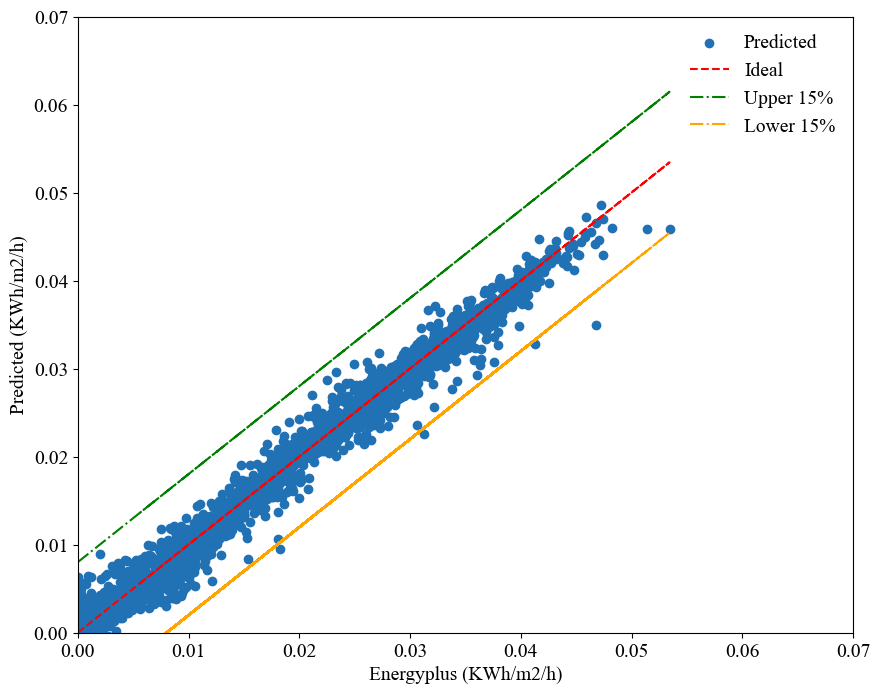

In [21]:
import numpy as np

# Calculate 20% of the range of Y_test
twenty_percent_range = 0.15 * (max(Y_test) - min(Y_test))

# Calculate upper and lower lines
upper_line = Y_test + twenty_percent_range
lower_line = Y_test - twenty_percent_range

plt.rc('font', family='Times New Roman')

plt.figure(figsize=(10, 8))
plt.scatter(Y_test, y_predict_res_xgb, color='#2171b5', label='Predicted')
plt.plot(Y_test, Y_test, color='red', linestyle='--', label='Ideal')  # Plot the ideal line where predicted equals actual
plt.plot(Y_test, upper_line, color='green', linestyle='-.', label='Upper 15%')
plt.plot(Y_test, lower_line, color='orange', linestyle='-.', label='Lower 15%')

plt.xlabel('Energyplus (KWh/m2/h)',fontsize=14)
plt.ylabel('Predicted (KWh/m2/h)',fontsize=14)
plt.xlim(0, 0.07)  # Set x-axis limits
plt.ylim(0, 0.07)  # Set y-axis limits
# plt.text(0.05, 0.003, f'R²: {0.71}', fontsize=10, ha='right')
# plt.text(0.05, 0.001, f'RMSE: {0.005}', fontsize=10, ha='right')
plt.legend(fontsize=14,frameon=False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(False)
plt.show()

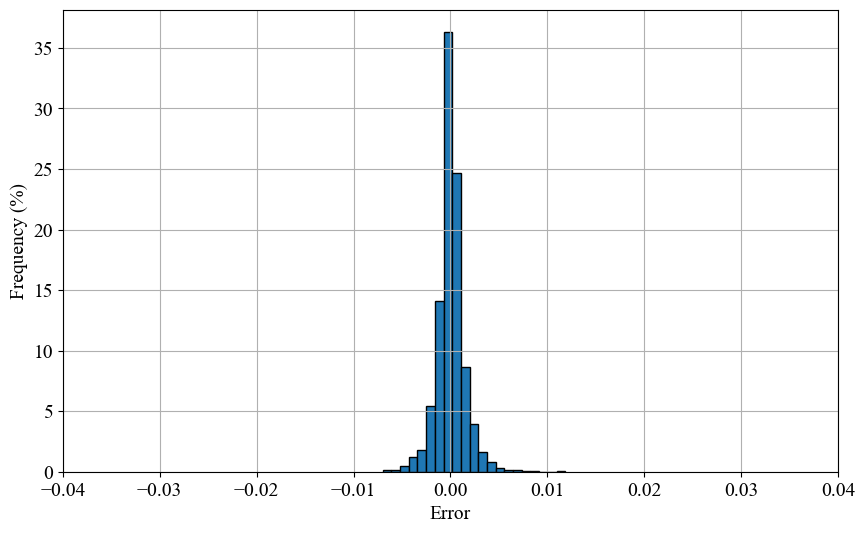

In [22]:
import matplotlib.pyplot as plt
import numpy as np

errors = Y_test - y_predict_res_xgb


weights = np.ones_like(errors) / len(errors) * 100


plt.figure(figsize=(10, 6))
plt.hist(errors, bins=21, edgecolor='black', weights=weights)

plt.xlabel('Error',fontsize = 14)
plt.ylabel('Frequency (%)',fontsize = 14)
plt.xlim(-0.04, 0.04)  
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.show()
